# Neutrophil Counts

This code takes Neutrophil counts from men and women with deleted and duplicated genes and compare them vs. control samples.

1. plot distribution of NEUTc (wo)men del vs. cont vs. dup
2. calculate separation bewteen del and cont in men and women

In [3]:
# Import useful functions
import ROOT as r
from AnalysisHelpers.ROOTUtils import DefineTree


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [11]:
#load data
def loadData(filename):
    t = DefineTree({'ID': 'I', 'sex': 'I', 'CNV16p600kb': 'I', 'NEUTc': 'F'})
#    i = 0
    for l in open(filename,'r'):
        if 'ID' in l: continue
        dd = l.split(',')
#        i += 1
        t['vars']['ID'][0] = int(dd[1])
        t['vars']['sex'][0] = int(dd[2])
        t['vars']['CNV16p600kb'][0] = int(dd[3])
        t['vars']['NEUTc'][0] = float(dd[4])
        t['tree'].Fill()
    return t
data = loadData('data/NEUTc.txt')

ID array('i', [0]) 0 int i
sex array('i', [0]) 0 int i
CNV16p600kb array('i', [0]) 0 int i
NEUTc array('f', [0.0]) 0.0 float f
******************************************************************************
*Tree    :tree      : a tree for my variable                                 *
*Entries :        0 : Total =            2279 bytes  File  Size =          0 *
*        :          : Tree compression factor =   1.00                       *
******************************************************************************
*Br    0 :ID        : ID/I                                                   *
*Entries :        0 : Total  Size=        473 bytes  One basket in memory    *
*Baskets :        0 : Basket Size=      32000 bytes  Compression=   1.00     *
*............................................................................*
*Br    1 :sex       : sex/I                                                  *
*Entries :        0 : Total  Size=        477 bytes  One basket in memory    *
*Bas

In [12]:
data['tree'].GetEntries()

359044

In [14]:
# disegnare distribuzione NEUTc uomini delete vs. cont vs. dup (-1, 0, 1)
men_del = []
men_con = []
men_dup = []
for ev in data['tree']:
    if ev.sex == 1: continue
    if ev.CNV16p600kb == 0: men_con += [ev.NEUTc]
    if ev.CNV16p600kb == -1: men_del += [ev.NEUTc]
    if ev.CNV16p600kb == 1: men_dup += [ev.NEUTc]
# disegnare distribuzione NEUTc donne delete vs. cont vs. dup (-1, 0, 1)
# significatività separazione del vs. cont uomini e donne

(array([2.89745938e-02, 2.78022126e-01, 8.21289020e-02, 8.08617431e-03,
        9.89254975e-04, 1.47247596e-04, 4.14781960e-05, 6.22172940e-06,
        2.07390980e-06, 8.29563920e-06]),
 array([ 0.        ,  2.51000004,  5.02000008,  7.53000011, 10.04000015,
        12.55000019, 15.06000023, 17.57000027, 20.08000031, 22.59000034,
        25.10000038]),
 <BarContainer object of 10 artists>)

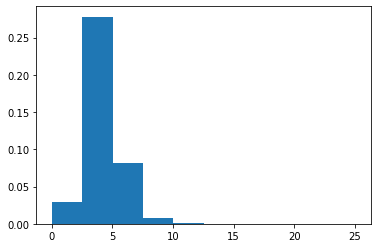

In [39]:
from matplotlib import pyplot as plt

plt.hist(men_con,density=True)

In [35]:
from AnalysisHelpers.HistUtils import HistUtils
hu = HistUtils()
h = {}
for i in ['del','con','dup']: h['men_'+i] = hu.DeclareHis('men_'+i,'CNV16p600kb',15,0,15)

In [36]:
for ev in data['tree']:
    if ev.sex == 1: continue
    if ev.CNV16p600kb == 0: h['men_con'].Fill(ev.NEUTc)
    if ev.CNV16p600kb == -1: h['men_del'].Fill(ev.NEUTc)
    if ev.CNV16p600kb == 1: h['men_dup'].Fill(ev.NEUTc)

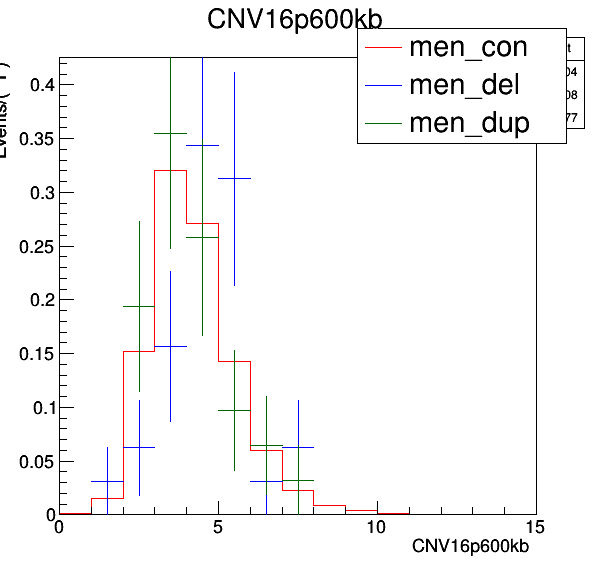

In [37]:
can = hu.PlotNorm([h['men_con'],h['men_del'],h['men_dup']])
can['canvas'].Draw()

In [43]:
import numpy as np
print('del: {:.2f} ± {:.2f}'.format(np.mean(men_del),np.std(men_del)))
print('con: {:.2f} ± {:.2f}'.format(np.mean(men_con),np.std(men_con)))
print('dup: {:.2f} ± {:.2f}'.format(np.mean(men_dup),np.std(men_dup)))

del: 4.79 ± 1.27
con: 4.21 ± 1.39
dup: 4.15 ± 1.25


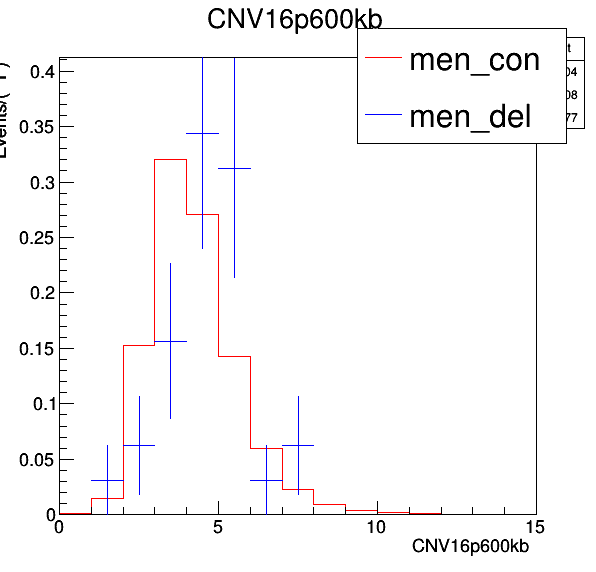

In [44]:
can = hu.PlotNorm([h['men_con'],h['men_del']])
can['canvas'].Draw()